Pyber Analysis - Three Trends:

1. Urban cities have more Total Fares, Total Rides and Total Drivers than the Rural and Suburban cities.

2. Total fares, rides and drivers increase in order from Rural > Suburban > Urban cities.

3. Rural and Suburban cities have a higher Average Fare than Urban cities, most likely because the supply of drivers does not meet the demand for the amount of rides needed.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
city_data = '../Matplotlib/city_data.csv'
ride_data = '../Matplotlib/ride_data.csv'

city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

In [3]:
city_df = city_df.drop_duplicates('city')
combine_df = city_df.merge(ride_df, on = 'city')
combine_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


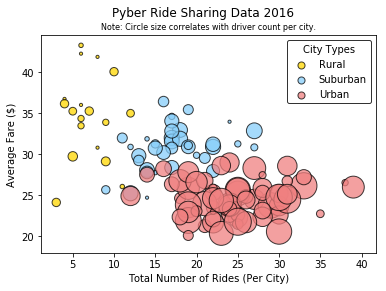

In [4]:
city_name = combine_df.groupby('city')
avg_fare = city_name.mean()['fare']
ride_count = city_name['ride_id'].count()
driver_count = city_name.mean()['driver_count']
city_type = city_df.set_index('city')['type']

city_info = pd.DataFrame({"Number of Rides": ride_count,
                        "Average Fare": avg_fare,
                        "Number of Drivers": driver_count,
                        "Type of City": city_type})

rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
citytypes_color = {'Rural': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Urban': color_scheme['Light Coral']}

plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = citytypes_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = citytypes_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = citytypes_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

plt.suptitle('Pyber Ride Sharing Data 2016')
plt.title('Note: Circle size correlates with driver count per city.', fontsize = 8)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')

lgnd = plt.legend(title = 'City Types', frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

plt.show()

In [5]:
plt.savefig('Pyber_ScatterPlot.png')

<Figure size 432x288 with 0 Axes>

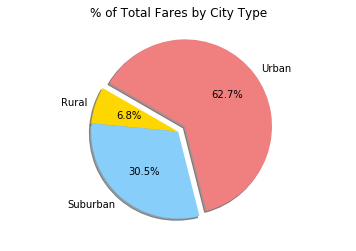

In [6]:
by_type = combine_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

total_fares = by_type.sum()['fare']
labels = total_fares.index

colors = [citytypes_color[n] for n in labels]
explode = [0, 0, .1]

plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.pie(total_fares, 
        labels = labels,
        colors = colors,
        explode = explode,
        shadow = True,
        startangle = 150,
        autopct = "%1.1f%%")

plt.show()

In [7]:
plt.savefig('Pyber_TotalFares_piechart.png')

<Figure size 432x288 with 0 Axes>

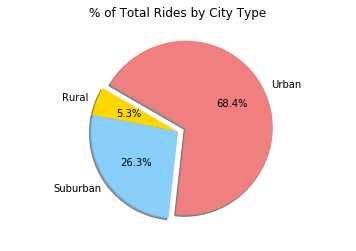

In [8]:
total_rides = by_type.count()['ride_id']

labels = total_rides.index

plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.pie(total_rides,
        labels = labels,
        colors = colors,
        explode = explode,
        shadow = True,
        startangle = 150,
        autopct = "%1.1f%%")

plt.show()

In [9]:
plt.savefig('Pyber_TotalRides_piechart.png')

<Figure size 432x288 with 0 Axes>

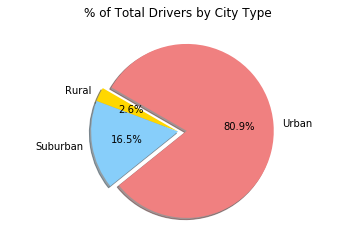

In [10]:
total_drivers = city_df.groupby('type').sum()['driver_count']

labels = total_drivers.index

plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.pie(total_drivers,
        labels = labels,
        colors = colors,
        explode = explode,
        shadow = True,
        startangle = 150,
        autopct = "%1.1f%%")

plt.show()

In [11]:
plt.savefig('Pyber_TotalDrivers_piechart.png')

<Figure size 432x288 with 0 Axes>